# TensorFlow basics
https://www.tensorflow.org/guide/basics

## Tensors

In [25]:
import tensorflow as tf

x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.]])

print(x)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)


In [26]:
x + x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [27]:
5 * x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 5., 10., 15.],
       [20., 25., 30.]], dtype=float32)>

In [28]:
x @ tf.transpose(x)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [29]:
tf.concat([x, x, x], axis=0)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [30]:
tf.concat([x, x, x], axis=1)

<tf.Tensor: shape=(2, 9), dtype=float32, numpy=
array([[1., 2., 3., 1., 2., 3., 1., 2., 3.],
       [4., 5., 6., 4., 5., 6., 4., 5., 6.]], dtype=float32)>

In [31]:
tf.concat([x, x, x], 0)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [32]:
tf.nn.softmax(x, axis=-1)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.09003057, 0.24472848, 0.6652409 ],
       [0.09003057, 0.24472848, 0.6652409 ]], dtype=float32)>

In [33]:
tf.reduce_sum(x)

<tf.Tensor: shape=(), dtype=float32, numpy=21.0>

In [34]:
tf.reduce_sum(x, axis=0)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([5., 7., 9.], dtype=float32)>

In [35]:
tf.reduce_sum(x, axis=1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 6., 15.], dtype=float32)>

In [36]:
if tf.config.list_physical_devices('GPU'):
    print("TensorFlow **IS** using the GPU")
else:
    print("TensorFlow **IS NOT** using the GPU")

TensorFlow **IS NOT** using the GPU


## Varaibles

In [37]:
var = tf.Variable([0.0, 0.0, 0.0])

In [38]:
var.assign([1, 2, 3])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [39]:
var.assign_add([1, 1, 1])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>

In [40]:
var

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>

## Automatic differentiation

In [41]:
x = tf.Variable(1.0)

def f(x):
    y = x**2 + 2*x -5
    return y

In [42]:
f(x)

<tf.Tensor: shape=(), dtype=float32, numpy=-2.0>

In [43]:
with tf.GradientTape() as tape:
    y = f(x)
    
g_x = tape.gradient(y, x)
g_x

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

## Graphs and tf.function

In [44]:
@tf.function
def my_func(x):
    print('Tracing.\n')
    return tf.reduce_sum(x)

In [47]:
x = tf.constant([1, 2, 3])
my_func(x)

<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [46]:
x = tf.constant([10, 9, 8])
my_func(x)

<tf.Tensor: shape=(), dtype=int32, numpy=27>

In [49]:
x = tf.constant([10.0, 9.1, 8.2], dtype=tf.float32)
my_func(x)


<tf.Tensor: shape=(), dtype=float32, numpy=27.3>

In [50]:
tf.saved_model

<module 'tensorflow._api.v2.saved_model' from 'U:\\projects\\learn-programming\\python\\tensorflow-lab\\.venv\\Lib\\site-packages\\tensorflow\\_api\\v2\\saved_model\\__init__.py'>

## Modules, layers, and models

In [51]:
class MyModule(tf.Module):
    def __init__(self, value):
        self.weight = tf.Variable(value)

    @tf.function
    def multiply(self, x):
        return x * self.weight

In [52]:
mod = MyModule(3)
mod.multiply(tf.constant([1, 2, 3]))


<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9])>

In [53]:
save_path = './saved'
tf.saved_model.save(mod, save_path)


INFO:tensorflow:Assets written to: ./saved\assets


INFO:tensorflow:Assets written to: ./saved\assets


In [1]:
import tensorflow as tf
save_path = './saved'

reloaded = tf.saved_model.load(save_path)
reloaded.multiply(tf.constant([1, 2, 3]))


<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9])>

## Training loops

In [2]:
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = [9, 6]


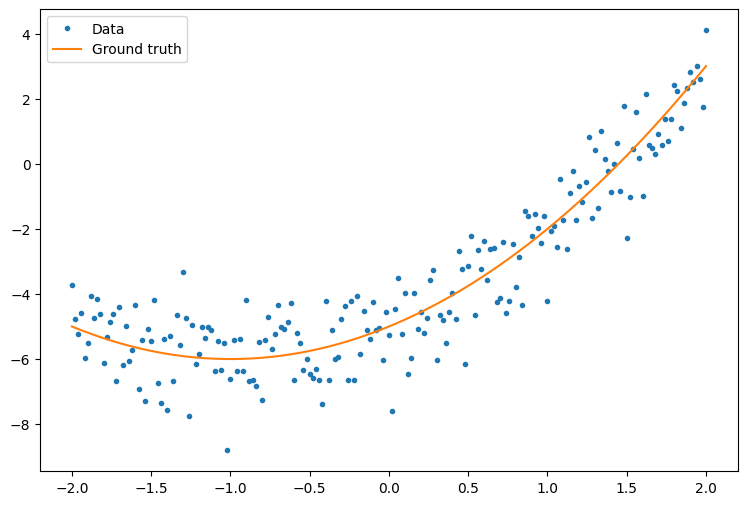

In [3]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)

def f(x):
    y = x**2 + 2*x - 5
    return y

y = f(x) + tf.random.normal(shape=[201])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x), label='Ground truth')
plt.legend();


In [4]:
class Model(tf.Module):

    def __init__(self):
        # Randomly generate weight and bias terms
        rand_init = tf.random.uniform(shape=[3], minval=0., maxval=5., seed=22)
        # Initialize model parameters
        self.w_q = tf.Variable(rand_init[0])
        self.w_l = tf.Variable(rand_init[1])
        self.b = tf.Variable(rand_init[2])

    @tf.function
    def __call__(self, x):
        # Quadratic Model : quadratic_weight * x^2 + linear_weight * x + bias
        return self.w_q * (x**2) + self.w_l * x + self.b

In [5]:
quad_model = Model()


In [6]:
def plot_preds(x, y, f, model, title):
    plt.figure()
    plt.plot(x, y, '.', label='Data')
    plt.plot(x, f(x), label='Ground truth')
    plt.plot(x, model(x), label='Predictions')
    plt.title(title)
    plt.legend()


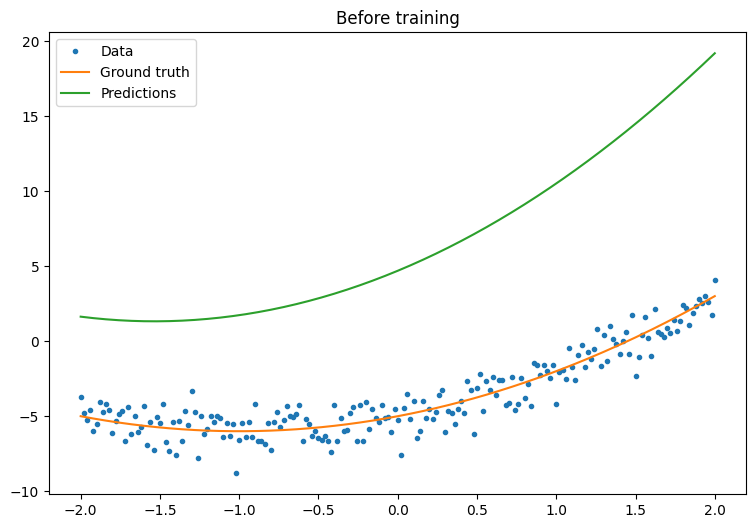

In [7]:
plot_preds(x, y, f, quad_model, 'Before training')


In [8]:
def mse_loss(y_pred, y):
    return tf.reduce_mean(tf.square(y_pred - y))


In [9]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=x.shape[0]).batch(batch_size)


Mean squared error for step 0: 56.746
Mean squared error for step 10: 9.893
Mean squared error for step 20: 4.035
Mean squared error for step 30: 2.013
Mean squared error for step 40: 1.313
Mean squared error for step 50: 1.068
Mean squared error for step 60: 0.983
Mean squared error for step 70: 0.948
Mean squared error for step 80: 0.937
Mean squared error for step 90: 0.933


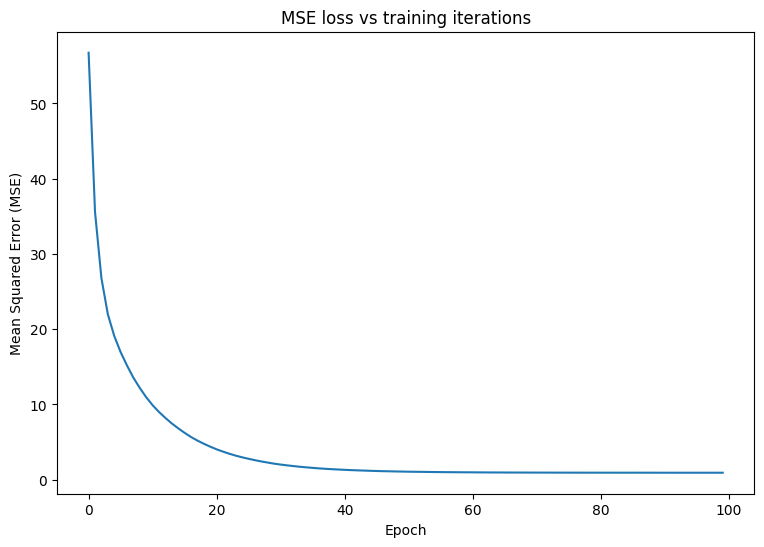

In [10]:
# Set training parameters
epochs = 100
learning_rate = 0.01
losses = []

# Format training loop
for epoch in range(epochs):
    for x_batch, y_batch in dataset:
        with tf.GradientTape() as tape:
            batch_loss = mse_loss(quad_model(x_batch), y_batch)
        # Update parameters with respect to the gradient calculations
        grads = tape.gradient(batch_loss, quad_model.variables)
        for g,v in zip(grads, quad_model.variables):
            v.assign_sub(learning_rate*g)
    # Keep track of model loss per epoch
    loss = mse_loss(quad_model(x), y)
    losses.append(loss)
    if epoch % 10 == 0:
        print(f'Mean squared error for step {epoch}: {loss.numpy():0.3f}')

# Plot model results
print("\n")
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title('MSE loss vs training iterations');


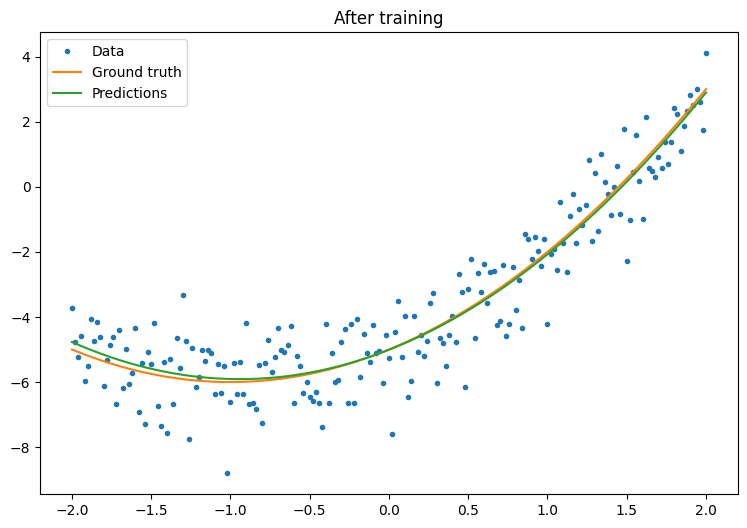

In [11]:
plot_preds(x, y, f, quad_model, 'After training')


In [12]:
new_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.stack([x, x**2], axis=1)),
    tf.keras.layers.Dense(units=1, kernel_initializer=tf.random.normal)])


In [13]:
new_model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01))

history = new_model.fit(x, y,
                        epochs=100,
                        batch_size=32,
                        verbose=0)

new_model.save('./my_new_model')


ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=./my_new_model.

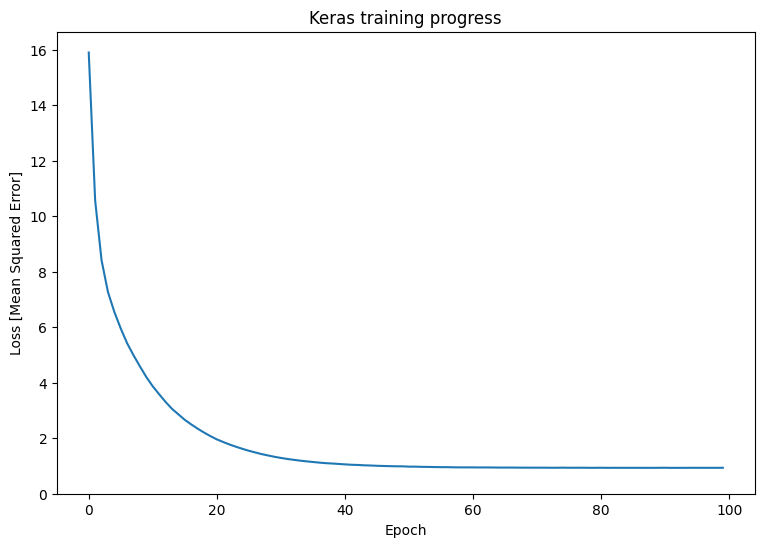

In [14]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss [Mean Squared Error]')
plt.title('Keras training progress');


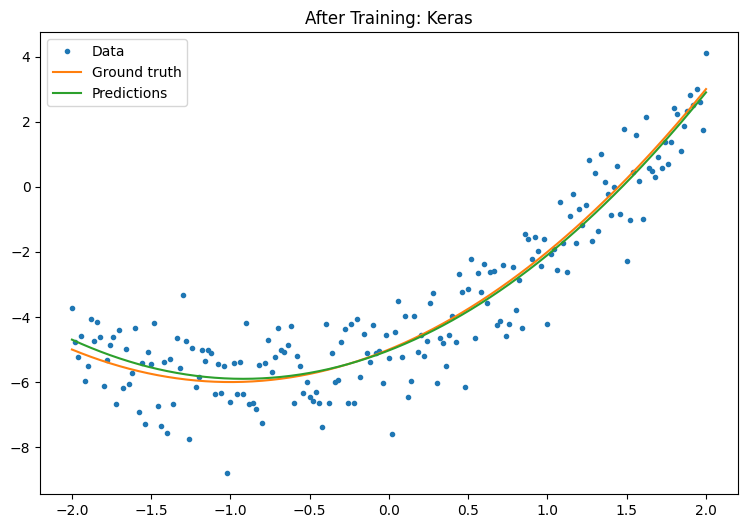

In [15]:
plot_preds(x, y, f, new_model, 'After Training: Keras')
